## Ανάλυση IMDB δεδομένων με scikit-learn & custom αλγόριθμοι
### Multilayer Perceptron (MLP)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

Ορίζουμε τις υπερπαραμέτρους που απαιτούνται για τα δεδομένα που θα χρησιμοποιήσουμε παρακάτω.

In [2]:
n = 100
m = 3000
k = 50

Παίρνουμε τα δεδομένα από τη βάση δεδομένων του IMDB, αγνοώντας τις πιο συχνά χρησιμοποιούμενες λέξεις n και τις λιγότερες χρησιμοποιούμενες λέξεις k. 

(Είναι οι υπερπαράμετροι που ορίσαμε παραπάνω.)

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=m-k, skip_top=n)

word_index = tf.keras.datasets.imdb.get_word_index()
index2word = dict((i + 3, word) for (word, i) in word_index.items())
index2word[0] = '[pad]'
index2word[1] = '[bos]'
index2word[2] = '[oov]'
x_train = np.array([' '.join([index2word[idx] for idx in text]) for text in x_train])
x_test = np.array([' '.join([index2word[idx] for idx in text]) for text in x_test])

### Δημιουργία δυαδικών διανυσμάτων
Τροποποιούμε τα δεδομένα που πήραμε έτσι ώστε να γίνουν δυαδικά διανύσματα. Τα διανύσματα αυτά αποτελούνται απο 0 και 1, με 1 να σημαίνει ότι η λέξη υπάρχει στο κείμενο, ενώ με 0 δεν υπάρχει.

In [4]:
from sklearn.feature_extraction.text import CountVectorizer

# min-df --> when building the vocabulary ignore terms that have a document frequency strictly lower than the given threshold.
binary_vectorizer = CountVectorizer(binary=True, min_df=100)
x_train_binary = binary_vectorizer.fit_transform(x_train)
x_test_binary = binary_vectorizer.transform(x_test)
print(
    'Vocabulary size:', len(binary_vectorizer.vocabulary_)
)
voc = len(binary_vectorizer.vocabulary_)

Vocabulary size: 2781


Χ είναι ένας πίνακας διανυσμάτων (αξιολογήσεων), με κάθε διάνυσμα να αναπαριστά λέξεις. 
Y είναι ένα διάνυσμα με ετικέτες (0 ή 1) όπου 0 είναι μια αρνητική αξιολόγηση και 1 μια θετική.

$$X = \begin{bmatrix} \vec{x_{1}} \\ \vdots \\ \vec{x_{m}} \end{bmatrix}\, \, \, 
y = \begin{bmatrix} y_{1} \\ \vdots \\ y_{m} \end{bmatrix}$$


In [5]:
x_train_binary = x_train_binary.toarray()
x_test_binary = x_test_binary.toarray()

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding
from tensorflow.keras.utils import plot_model
from IPython.display import Image

### Υλοποίηση του μοντέλου MLP

In [7]:
model = Sequential()
model.add(Embedding(input_dim=voc, output_dim=5,input_length=voc))
model.add(Dense(32, activation='relu', input_shape=(voc,)))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train_binary, y_train, epochs=4, batch_size=32, validation_split=0.2)



Epoch 1/4


625/625 [==============================] - 37s 58ms/step - loss: 0.3871 - accuracy: 0.8274 - val_loss: 0.3133 - val_accuracy: 0.8672
Epoch 2/4
625/625 [==============================] - 36s 57ms/step - loss: 0.2771 - accuracy: 0.8866 - val_loss: 0.3187 - val_accuracy: 0.8678
Epoch 3/4
625/625 [==============================] - 35s 55ms/step - loss: 0.2604 - accuracy: 0.8952 - val_loss: 0.3306 - val_accuracy: 0.8682
Epoch 4/4
625/625 [==============================] - 35s 57ms/step - loss: 0.2508 - accuracy: 0.8984 - val_loss: 0.3305 - val_accuracy: 0.8664


In [8]:
from visualizations import *

### Αποτελέσματα του MLP στα συνολικά δεδομένα αξιολόγησης

In [9]:
results = model.evaluate(x_test_binary, y_test)
y = model.predict(x_test_binary)
y = (y > 0.5).astype(int)

print(classification_report(y_test, y))

782/782 [==============================] - 11s 14ms/step
              precision    recall  f1-score   support

           0       0.86      0.86      0.86     12500
           1       0.86      0.86      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



In [10]:
dat = classification_data(model, x_train_binary, y_train, x_test_binary, y_test, 5, model='Sequential')

782/782 [==============================] - 12s 15ms/step


### Αποτελέσματα του MLP
Εξετάζεται στα test δεδομένα και τα αποτελέσματα φαίνονται στον πίνακα παρακάτω. Επίσης γίνεται και μια σύγκριση μεταξύ των αποτελεσμάτων πρόβλεψης των δεδομένων εκπαίδευσης και των δεδομένων προς εξέταση. 

,Train Accuracy,Test Accuracy,Precision Train,Precision Test,Recall Train,Recall Test,F1 Train,F1 Test
5000,0.95,0.86,0.95,0.86,0.94,0.85,0.95,0.85
10000,0.94,0.85,0.95,0.86,0.93,0.84,0.94,0.85
15000,0.93,0.85,0.94,0.86,0.92,0.84,0.93,0.85
20000,0.92,0.86,0.91,0.85,0.93,0.87,0.92,0.86
25000,0.91,0.86,0.92,0.87,0.90,0.85,0.91,0.86


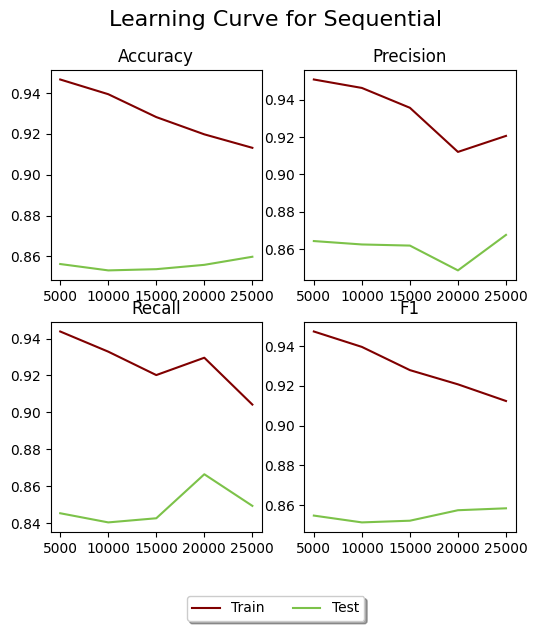

In [11]:
dat_table = classification_table(dat, x_train_binary)
ipd.display(dat_table)

r = classification_plots(dat)

Παρακάτω φαίνεται η σύνοψη του μοντέλου που έχουμε δημιούργησει.

In [12]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2781, 5)           13905     
                                                                 
 dense (Dense)               (None, 2781, 32)          192       
                                                                 
 dropout (Dropout)           (None, 2781, 32)          0         
                                                                 
 dense_1 (Dense)             (None, 2781, 32)          1056      
                                                                 
 flatten (Flatten)           (None, 88992)             0         
                                                                 
 dense_2 (Dense)             (None, 1)                 88993     
                                                                 
Total params: 104146 (406.82 KB)
Trainable params: 10414

### Σύγκριση του MLP με τον Bernoulli Naive Bayes
Εξετάζονται και οι δύο στα ίδια δεδομένα εκπαίδευσης και αξιολόγησης και τα αποτελέσματα διαφοράς φαίνονται στον πίνακα παρακάτω. Παρατηρούμε ότι τόσο ο Naive Bayes όσο και το MLP τα εξίσου καλά στα δεδομένα αξιολόγησης με το MLP να τα πηγαίνει λίγο καλύτερα.

,Train Accuracy,Test Accuracy,Precision Train,Precision Test,Recall Train,Recall Test,F1 Train,F1 Test
5000,0.08,0.02,0.07,0.01,0.07,0.02,0.07,0.01
10000,0.07,0.00,0.09,0.01,0.06,0.01,0.07,0.00
15000,0.07,0.00,0.08,0.01,0.05,0.00,0.07,0.00
20000,0.06,0.01,0.05,0.00,0.07,0.03,0.06,0.01
25000,0.05,0.01,0.07,0.02,0.03,0.00,0.05,0.01


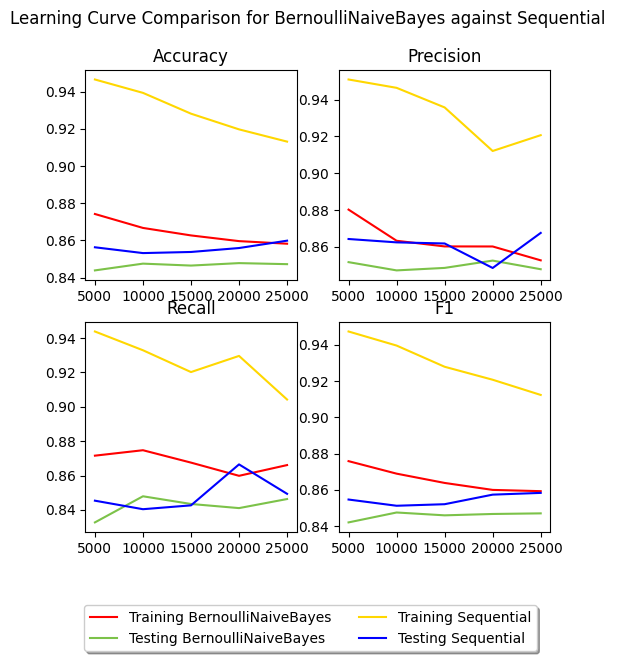

In [13]:
nb_data = {'estimator': 'BernoulliNaiveBayes', 'split_size': 5000, 'splits': 5, 'test_predictions': np.array([0, 1, 1, ..., 0, 0, 1]), 'train_accuracy': [0.8742, 0.8667, 0.8626666666666667, 0.8596, 0.8582], 'test_accuracy': [0.84384, 0.84748, 0.84644, 0.84776, 0.8472], 'train_precision': [0.8802062673542245, 0.86328125, 0.8602079768329604, 0.8601775206941259, 0.8526423564621565], 'test_precision': [0.8516609392898052, 0.8471744864519223, 0.8485311871227365, 0.8524975673045735, 0.8478121493829139], 'train_recall': [0.8715632364493323, 0.874727884425094, 0.8675162617814948, 0.8598345130096701, 0.86608], 'test_recall': [0.83272, 0.84792, 0.84344, 0.84104, 0.84632], 'train_f1': [0.8758634300374976, 0.8689668730954486, 0.8638466622604098, 0.8600059826503141, 0.8593086478549034], 'test_f1': [0.8420839737885284, 0.8475470792851144, 0.8459779338014041, 0.8467300257731958, 0.8470654175674593], 'final_cm': np.array([[10601,  1899],[ 1921, 10579]], dtype=np.int64)}
nb_data_table = classification_table(nb_data, x_test_binary)
ipd.display(abs(nb_data_table - dat_table))

x=classification_plots_compare(nb_data, dat)


### Σύγκριση του MLP με τον Logistic Regression
Εξετάζονται και οι δύο στα ίδια δεδομένα εκπαίδευσης και αξιολόγησης και τα αποτελέσματα διαφοράς φαίνονται στον πίνακα παρακάτω. Παρατηρούμε ότι τόσο ο Logistic Regression όσο και το MLP τα εξίσου καλά στα δεδομένα αξιολόγησης με το MLP να τα πηγαίνει καλύτερα.

,Train Accuracy,Test Accuracy,Precision Train,Precision Test,Recall Train,Recall Test,F1 Train,F1 Test
5000,0.11,0.05,0.16,0.09,0.02,0.05,0.10,0.02
10000,0.10,0.02,0.13,0.05,0.06,0.01,0.09,0.02
15000,0.09,0.02,0.10,0.03,0.08,0.01,0.09,0.02
20000,0.08,0.03,0.08,0.02,0.08,0.04,0.08,0.03
25000,0.08,0.03,0.07,0.02,0.09,0.05,0.08,0.04


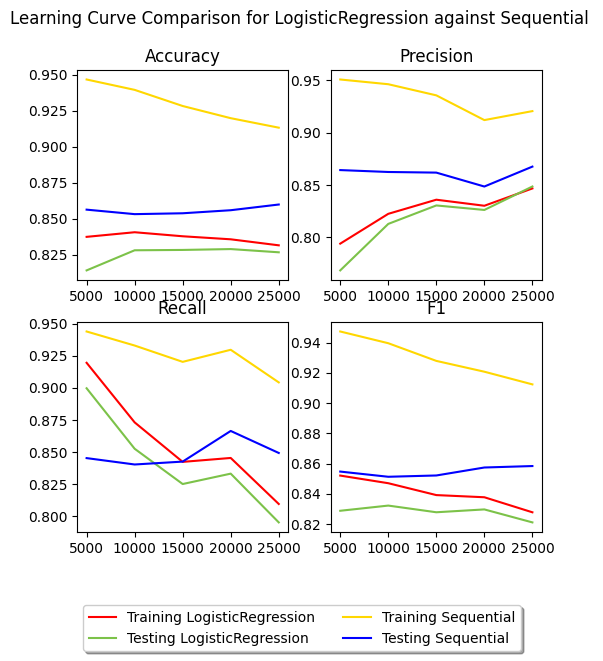

In [14]:
lg_data = {'estimator': 'LogisticRegression', 'split_size': 5000, 'splits': 5, 'test_predictions': [0,1,1,1,0],'train_accuracy': [0.8374, 0.8406, 0.8378, 0.8357, 0.83152], 'test_accuracy': [0.81412, 0.82808, 0.82832, 0.82892, 0.82668], 'train_precision': [0.7938284164123431, 0.8223671947809879, 0.8358798735511064, 0.8300871097190956, 0.8466622051196252], 'test_precision': [0.7682218730787622, 0.8127192313558029, 0.8303815810658509, 0.8260766119438496, 0.8485107109328326], 'train_recall': [0.9194815396700707, 0.8731446665347319, 0.8424266560467277, 0.8454790150533347, 0.80968], 'test_recall': [0.89968, 0.85264, 0.8252, 0.83328, 0.79536], 'train_f1': [0.8520473157415832, 0.8469955845651757, 0.8391404958677685, 0.8377123666534967, 0.8277582399607425], 'test_f1': [0.8287704042153359, 0.8322011400015615, 0.8277826819677393, 0.8296626707555, 0.8210761035636123]}
lg_data_table = classification_table(lg_data, x_test_binary)
ipd.display(abs(lg_data_table - dat_table))

x=classification_plots_compare(lg_data, dat)

### Σύγκριση του MLP με τον Random Forest
Εξετάζονται και οι δύο στα ίδια δεδομένα εκπαίδευσης και αξιολόγησης και τα αποτελέσματα διαφοράς φαίνονται στον πίνακα παρακάτω. Παρατηρούμε ότι τόσο ο Random Forest όσο και το MLP τα εξίσου καλά στα δεδομένα αξιολόγησης με το MLP να τα πηγαίνει καλύτερα.

In [ ]:
rf_data = {'estimator': 'RandomForest', 'split_size': 5000, 'splits': 5 }
rf_data_table = classification_table(rf_data, x_test_binary)
ipd.display(abs(rf_data_table - dat_table))

x=classification_plots_compare(rf_data, dat)

### Σύναρτηση Απώλειας του MLP συναρτήσει των εποχών.
Με κάθε εποχή παρατηρούμε ότι η απώλεια στα δοκιμαστικά δεδομένα μειώνεται δραστικά πολύ, ενώ στα validation αυξάνεται σταδιακά ελάχιστα.


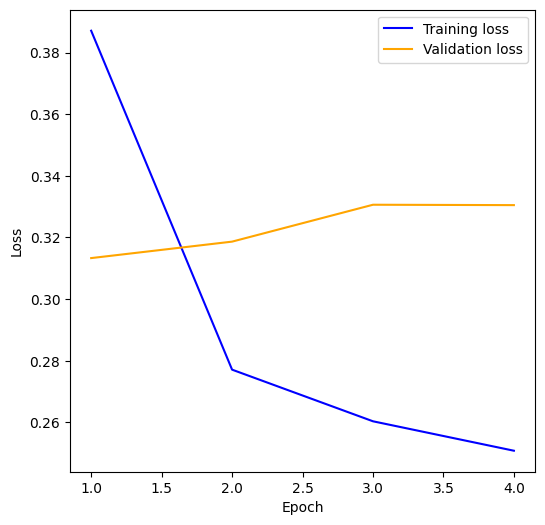

In [15]:
x = loss_plot(history, 'loss')